In [2]:
from fapa_analysis_lib import data_processing as dp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


At the very beginning we will load the files and take a look at the data. Then we will process it to make it more clear and easy to perform analysis

# **Alcohol selling concession data**

In [18]:
alcohol_data = dp.load_csv_file("/Users/kacper/Desktop/NYPD_project_final/data/alcohol_data.csv")  
alcohol_data.head()

,Numer zezwolenia,Nazwa firmy,Kod pocztowy,Miejscowość,Adres,Województwo,Data ważności
0,394/23,AMKA Spółka z ograniczoną odpowiedzialnością,02-972,Warszawa,Aleja Rzeczypospolitej 18/83,WOJ. MAZOWIECKIE,2025-02-28
1,404/23,WORMAR K Spółka z ograniczoną odpowiedzialnością,83-300,Kartuzy,ul. Zamkowa 23,WOJ. POMORSKIE,2025-03-03
2,407/23,RAFAŁ DZILIŃSKI,06-400,Ciechanów,ul. Leśna 52,WOJ. MAZOWIECKIE,2025-02-21
3,5/W/24,ALKOSWIAT Spółka z ograniczoną odpowiedzialnością,43-300,Bielsko-Biała,ul. Wincentego Witosa 170,WOJ. ŚLĄSKIE,2025-03-30
4,6/W/24,Matyl Fenikost Aleksadra Matyl-Stawowy,34-212,Bieńkówka,Bienkówka 454,WOJ. MAŁOPOLSKIE,2025-04-20


We get rid of *'Numer zezwolenia'*, *'Nazwa firmy'*, *'Kod pocztowy'*, *'Adres'* and *'Data waznosci'* as this data will not come in handy during analysis.

In [19]:
alcohol_cols_to_drop = ['Numer zezwolenia', 'Nazwa firmy', 'Kod pocztowy', 'Adres', 'Data ważności']
alcohol_data = dp.drop_columns(alcohol_data, alcohol_cols_to_drop)
alcohol_data = dp.delete_spaces(alcohol_data, 'Miejscowość')
alcohol_data = dp.cut_after_comma(alcohol_data, 'Miejscowość')
alcohol_data_cities = dp.count_unique(alcohol_data, 'Miejscowość')
alcohol_data_voj = dp.count_unique(alcohol_data, 'Województwo')
alcohol_data_voj = dp.delete_prefix(alcohol_data_voj, 'Województwo', ['woj.'])
alcohol_data_voj['Województwo'] = alcohol_data_voj['Województwo'].str.strip()
alcohol_data_voj['Województwo'] = alcohol_data_voj['Województwo'].astype(str)


In [5]:
alcohol_data_cities.head()

,Miejscowość,Count
0,warszawa,78
1,kraków,15
2,poznań,12
3,łódź,11
4,gdynia,7


In [6]:
alcohol_data_voj.head()

,Województwo,Count
0,mazowieckie,129
1,wielkopolskie,52
2,małopolskie,43
3,śląskie,37
4,pomorskie,28


# **Fire incidents data**

In [7]:
fire_incidents_data = dp.load_excel_file("/Users/kacper/Desktop/NYPD_project_final/data/fire_incidents.xlsx", 0)   
fire_incidents_data.head()

,TERYT,Województwo,Powiat,Gmina,Ogółem zdarzeń rok 2023,Ogółem zdarzeń rok 2024,Pożary rok 2023,Pożary rok 2024,Miejscowe zagrożenia rok 2023,Miejscowe zagrożenia rok 2024,Alarmy fałszywe rok 2023,Alarmy fałszywe rok 2024
0,20101,dolnośląskie,bolesławiecki,Bolesławiec,461,506,91,79,310,366,60,61
1,20102,dolnośląskie,bolesławiecki,Bolesławiec,242,525,68,75,160,427,14,23
2,20103,dolnośląskie,bolesławiecki,Gromadka,161,153,37,66,110,77,14,10
3,20104,dolnośląskie,bolesławiecki,Nowogrodziec,285,370,121,155,148,197,16,18
4,20105,dolnośląskie,bolesławiecki,Osiecznica,124,153,30,41,83,98,11,14


We get rid *'Ogółem zdarzeń rok 2023'*, *'Pożary rok 2023'*, *'Miejscowe zagrożenia rok 2023'*, *'Alarmy fałszywe rok 2023'* columns because we will analyze data from 2024. We drop *'Powiat'* column as well because we will focus on voivodships and gminas

In [8]:
fire_columns_to_drop = ['Powiat', 'Ogółem zdarzeń rok 2023', 'Pożary rok 2023', 'Miejscowe zagrożenia rok 2023', 'Alarmy fałszywe rok 2023'] 
fire_incidents_data = dp.drop_columns(fire_incidents_data, fire_columns_to_drop)
fire_incidents_data = dp.lower_the_case(fire_incidents_data, 'Gmina')
fire_incidents_data['TERYT'] = fire_incidents_data['TERYT'].astype(str)


fire_incidents_data.head()

,TERYT,Województwo,Gmina,Ogółem zdarzeń rok 2024,Pożary rok 2024,Miejscowe zagrożenia rok 2024,Alarmy fałszywe rok 2024
0,20101,dolnośląskie,bolesławiec,506,79,366,61
1,20102,dolnośląskie,bolesławiec,525,75,427,23
2,20103,dolnośląskie,gromadka,153,66,77,10
3,20104,dolnośląskie,nowogrodziec,370,155,197,18
4,20105,dolnośląskie,osiecznica,153,41,98,14


In [9]:
fires_in_voj = dp.drop_columns(fire_incidents_data, ['TERYT', 'Gmina'])
fires_in_voj['Województwo'] = fires_in_voj['Województwo'].str.strip()
fires_in_voj['Województwo'] = fires_in_voj['Województwo'].astype(str)
fires_in_voj = fires_in_voj.groupby('Województwo', as_index=False).sum()

fires_in_voj.head()


,Województwo,Ogółem zdarzeń rok 2024,Pożary rok 2024,Miejscowe zagrożenia rok 2024,Alarmy fałszywe rok 2024
0,dolnośląskie,53257,10957,36984,5316
1,kujawsko-pomorskie,28620,5222,20757,2641
2,lubelskie,23691,5675,16345,1671
3,lubuskie,15310,3475,10316,1519
4,mazowieckie,78212,17318,50385,10509


# **Population data**

In [10]:
population_data = dp.load_excel_file("/Users/kacper/Desktop/NYPD_project_final/data/population_data.xls", 7)  

population_data.head()

,POLSKA \nPOLAND,Unnamed: 1,37489087,135402,251782,408504,898,-156722,430262,430262.1,...,19515,10214,9301,9301.1,3.6047,6.7029,10.8751,-4.1722,0.2476,3.5666
0,WOJ. DOLNOŚLĄSKIE,,2868242,10920,18194,32463,81,-14269,39057,35478,...,1549,1130,419,3998,3.7989,6.3295,11.2935,-4.964,1.3909,4.452
1,M.Bolesławiec,0201011,36795,129,223,480,1,-257,387,456,...,14,10,4,-65,3.4993,6.0493,13.0208,-6.9716,-1.7632,4.4843
2,G.Bolesławiec,0201022,15359,62,74,114,-,-40,346,202,...,5,2,3,147,4.0422,4.8246,7.4325,-2.6079,9.584,-
3,G.Gromadka,0201032,4978,14,27,62,-,-35,65,63,...,5,3,2,4,2.8017,5.4032,12.4074,-7.0042,0.8005,-
4,M-W.Nowogrodziec,0201043,14523,64,88,143,1,-55,173,207,...,7,10,-3,-37,4.3863,6.0311,9.8006,-3.7694,-2.5358,11.3636


We keep only first three columns which are *territory*, *territory code* and *population*. 

In [28]:
population_data = population_data.iloc[:,[0,1,2]]
population_data.columns = ['Nazwa jednostki','Kod', 'Populacja']
population_data = dp.delete_prefix(population_data, 'Kod', '0')
population_data = dp.drop_last_char(population_data, 'Kod')
population_data = dp.drop_rows_by_prefix(population_data, 'Nazwa jednostki', 'M-W.')
population_data = dp.drop_rows_by_prefix(population_data, 'Nazwa jednostki', 'G.')
population_data = dp.delete_prefix(population_data, 'Nazwa jednostki', 'M.')
population_data = dp.delete_prefix(population_data, 'Nazwa jednostki', '.')
population_data = dp.lower_the_case(population_data, 'Nazwa jednostki')
population_data = dp.delete_prefix(population_data, "Nazwa jednostki", ["woj."])
population_data['Nazwa jednostki'] = population_data['Nazwa jednostki'].str.strip()
population_data['Nazwa jednostki'] = population_data['Nazwa jednostki'].astype(str)
population_data.head()

,Nazwa jednostki,Kod,Populacja
0,dolnośląskie,,2868242
1,bolesławiec,2010,36795
5,nowogrodziec,2010,4050
9,bielawa,2020,27713
10,dzierżoniów,2020,30312


# **Area data**

In [12]:
area_data = dp.load_excel_file("/Users/kacper/Desktop/NYPD_project_final/data/area_data.xlsx", 0)  
area_data.head()

,TERYT,Nazwa jednostki,Powierzchnia [ha],Powierzchnia [km2],Unnamed: 4,Unnamed: 5
0,00,POLSKA,31393293,313933,NaN,Kolumna „Powierzchnia [km2]” prezentuje dane o...
1,02,WOJ. DOLNOŚLĄSKIE,1994714,19947,NaN,Powierzchnie wszystkich rodzajów jednostek pod...
2,02 01,Powiat bolesławiecki,130351,1304,NaN,Wobec zastosowania reguły Kryłowa-Bradisa suma...
3,02 01 01 1,Bolesławiec,2285,23,NaN,NaN
4,02 01 02 2,Bolesławiec,28913,289,NaN,NaN


We drop area in ha and last two columns.

In [13]:
area_columns_to_drop = ['Powierzchnia [ha]', 'Unnamed: 4', 'Unnamed: 5']
area_data = dp.drop_columns(area_data, area_columns_to_drop)    
area_data = dp.lower_the_case(area_data, 'Nazwa jednostki')
area_data = dp.delete_spaces(area_data, 'TERYT')
area_data = dp.delete_spaces(area_data, 'Nazwa jednostki')
area_data = dp.delete_prefix(area_data, 'TERYT', '0')
area_data = dp.drop_last_char(area_data, 'TERYT')
area_data = dp.drop_rows_by_suffix(area_data, 'Nazwa jednostki', '-miasto')
area_data = dp.drop_rows_by_suffix(area_data, 'Nazwa jednostki', '-obszarwiejski')
area_data= dp.delete_prefix(area_data, "Nazwa jednostki", ["woj."])

area_data.head()

,TERYT,Nazwa jednostki,Powierzchnia [km2]
0,,polska,313933
1,,dolnośląskie,19947
2,20,powiatbolesławiecki,1304
3,20101,bolesławiec,23
4,20102,bolesławiec,289


# **Analysis**

Now that we have out data prepared for analysis, we can merge merge some of them together and calculate the correlation. 
First we will take a look at the relationship between number of alcohol sellers and population.

## Number of alcohol selling concessions and population (voievodship)


In [32]:
alcohol_vs_population_voj = dp.custom_merge(alcohol_data_voj, population_data, 'Województwo', 'Nazwa jednostki')
corr_alc_vs_pop_voj = alcohol_vs_population_voj["Count"].corr(alcohol_vs_population_voj["Populacja"])
alcohol_vs_population_voj_results = pd.DataFrame({
    'Correlation': ['# of alcohol selling companies vs population in voievodship'],
    'value': [corr_alc_vs_pop_voj]
})

alcohol_vs_population_voj_results

,Correlation,value
0,# of alcohol selling companies vs population i...,0.882093


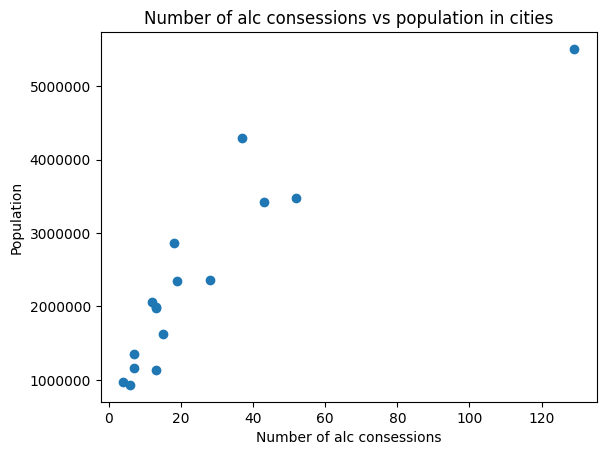

In [15]:
num_of_alc = alcohol_vs_population_voj["Count"].to_numpy()
population = alcohol_vs_population_voj["Populacja"].to_numpy()

x = num_of_alc
y = population

plt.scatter(x, y)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Number of alc consessions vs population in cities')
plt.xlabel("Number of alc consessions")
plt.ylabel("Population")
plt.show()

## Number of alcohol selling concessions and population (cities)


In [16]:
alcohol_vs_population_cities = dp.custom_merge(alcohol_data_cities, population_data, 'Miejscowość', 'Nazwa jednostki')
corr_alc_vs_pop_cities = alcohol_vs_population_cities["Count"].corr(alcohol_vs_population_cities["Populacja"])
alcohol_vs_population_cities_results = pd.DataFrame({
    'Correlation': ['# of alcohol selling companies vs population in cities'],
    'value': [corr_alc_vs_pop_cities]
})

alcohol_vs_population_cities_results

,Correlation,value
0,# of alcohol selling companies vs population i...,0.899031


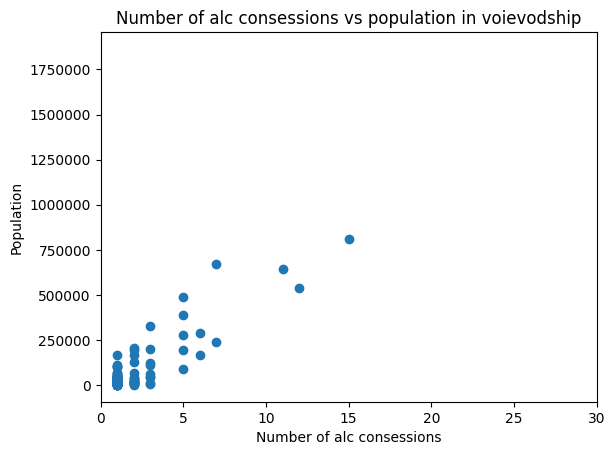

In [16]:
num_of_alc = alcohol_vs_population_cities["Count"].to_numpy()
population = alcohol_vs_population_cities["Populacja"].to_numpy()

x, y = num_of_alc, population

plt.scatter(x, y)
plt.xlim(0,30)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Number of alc consessions vs population in cities')
plt.xlabel("Number of alc consessions")
plt.ylabel("Population")
plt.show()

## Number of fire incidents vs number of alcohol selling concessions (voievodship)

In [21]:
fires_vs_alcohol_voj = dp.custom_merge(alcohol_data_voj, fires_in_voj, 'Województwo', 'Województwo')
fires_vs_alcohol_voj.head()


,Województwo,Count,Ogółem zdarzeń rok 2024,Pożary rok 2024,Miejscowe zagrożenia rok 2024,Alarmy fałszywe rok 2024
0,mazowieckie,129,78212,17318,50385,10509
1,wielkopolskie,52,45801,7688,33172,4941
2,małopolskie,43,49437,6849,38138,4450
3,śląskie,37,80428,10196,63264,6968
4,pomorskie,28,30700,5466,22852,2382


In [18]:
corr_all_fire_vs_alc_voj = fires_vs_alcohol_voj["Count"].corr(fires_vs_alcohol_voj["Ogółem zdarzeń rok 2024"])
corr_actual_fire_vs_alc_voj = fires_vs_alcohol_voj["Count"].corr(fires_vs_alcohol_voj["Pożary rok 2024"])
corr_false_fire_vs_alc_voj = fires_vs_alcohol_voj["Count"].corr(fires_vs_alcohol_voj["Alarmy fałszywe rok 2024"])

fire_vs_alcohol_voj_result = pd.DataFrame({
        'Correlation':['# of all fire incidents vs # of alcohol selling companies: ',
                       '# of actual fire incidents vs # of alcohol selling companies: ',
                       '# of false reports of fire incidents vs # of alcohol selling companies: '],

        'value': [corr_all_fire_vs_alc_voj,
                  corr_actual_fire_vs_alc_voj,
                  corr_false_fire_vs_alc_voj]
    })

fire_vs_alcohol_voj_result

,Correlation,value
0,# of all fire incidents vs # of alcohol sellin...,0.768446
1,# of actual fire incidents vs # of alcohol sel...,0.871071
2,# of false reports of fire incidents vs # of a...,0.877393


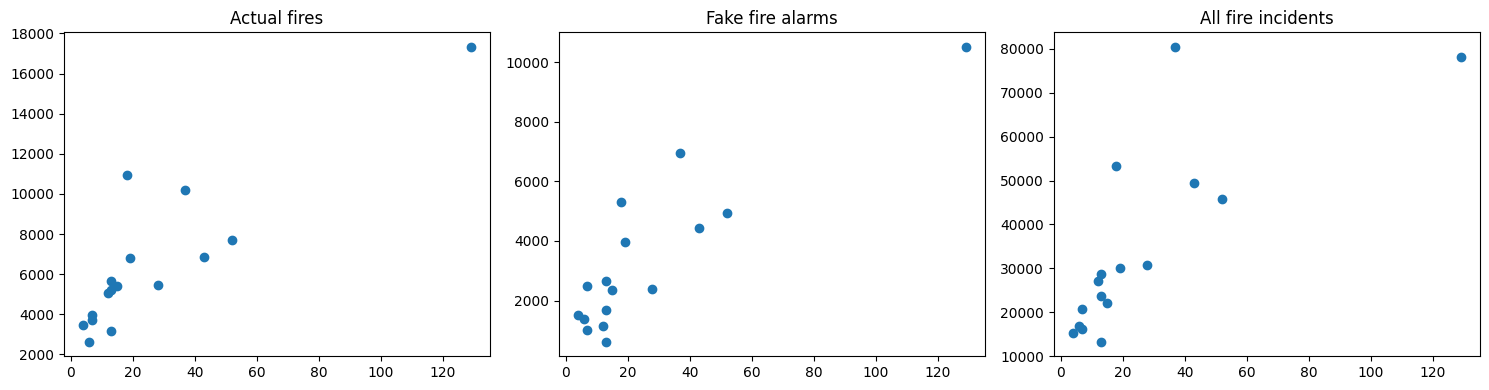

In [19]:
num_of_alc = fires_vs_alcohol_voj["Count"].to_numpy()
fake_fire = fires_vs_alcohol_voj["Alarmy fałszywe rok 2024"].to_numpy()
all_fire = fires_vs_alcohol_voj["Ogółem zdarzeń rok 2024"].to_numpy()
actual_fire = fires_vs_alcohol_voj["Pożary rok 2024"].to_numpy()

x, y1, y2, y3 = num_of_alc, actual_fire, fake_fire, all_fire

fig, axs = plt.subplots(1,3, figsize=(15, 4))

axs[0].scatter(x, y1)
axs[0].set_title('Actual fires')

axs[1].scatter(x, y2)
axs[1].set_title('Fake fire alarms')

axs[2].scatter(x, y3)
axs[2].set_title('All fire incidents')



plt.tight_layout()  
plt.show()

## Number of fire incidents vs number of alcohol selling concessions (cities)
(we assume that the names of gminas and cities coincide)

In [20]:
fires_vs_alcohol_cities = dp.custom_merge(fire_incidents_data, alcohol_data_cities, "Gmina", 'Miejscowość')
fires_vs_alcohol_cities = dp.drop_columns(fires_vs_alcohol_cities, ['TERYT', 'Województwo','Gmina'])
fires_vs_alcohol_cities = fires_vs_alcohol_cities.groupby('Miejscowość', as_index = False).sum()
fires_vs_alcohol_cities.head()

,Miejscowość,Ogółem zdarzeń rok 2024,Pożary rok 2024,Miejscowe zagrożenia rok 2024,Alarmy fałszywe rok 2024,Count
0,białogard,321,80,205,36,2
1,białystok,1351,349,914,88,6
2,bielsko-biała,3712,208,3102,402,6
3,bodzanów,168,32,135,1,1
4,brodnica,535,88,389,58,3


In [21]:
corr_all_fire_vs_alc_cities = fires_vs_alcohol_cities["Count"].corr(fires_vs_alcohol_cities["Ogółem zdarzeń rok 2024"])
corr_actual_fire_vs_alc_cities = fires_vs_alcohol_cities["Count"].corr(fires_vs_alcohol_cities["Pożary rok 2024"])
corr_false_fire_vs_alc_cities = fires_vs_alcohol_cities["Count"].corr(fires_vs_alcohol_cities["Alarmy fałszywe rok 2024"])

fire_vs_alcohol_cities_result = pd.DataFrame({
        'Correlation':['# of all fire incidents vs # of alcohol selling companies: ',
                       '# of actual fire incidents vs # of alcohol selling companies: ',
                       '# of false reports of fire incidents vs # of alcohol selling companies: '],

        'value': [corr_all_fire_vs_alc_cities,
                  corr_actual_fire_vs_alc_cities,
                  corr_false_fire_vs_alc_cities]
    })

fire_vs_alcohol_cities_result

,Correlation,value
0,# of all fire incidents vs # of alcohol sellin...,0.809305
1,# of actual fire incidents vs # of alcohol sel...,0.815928
2,# of false reports of fire incidents vs # of a...,0.860377


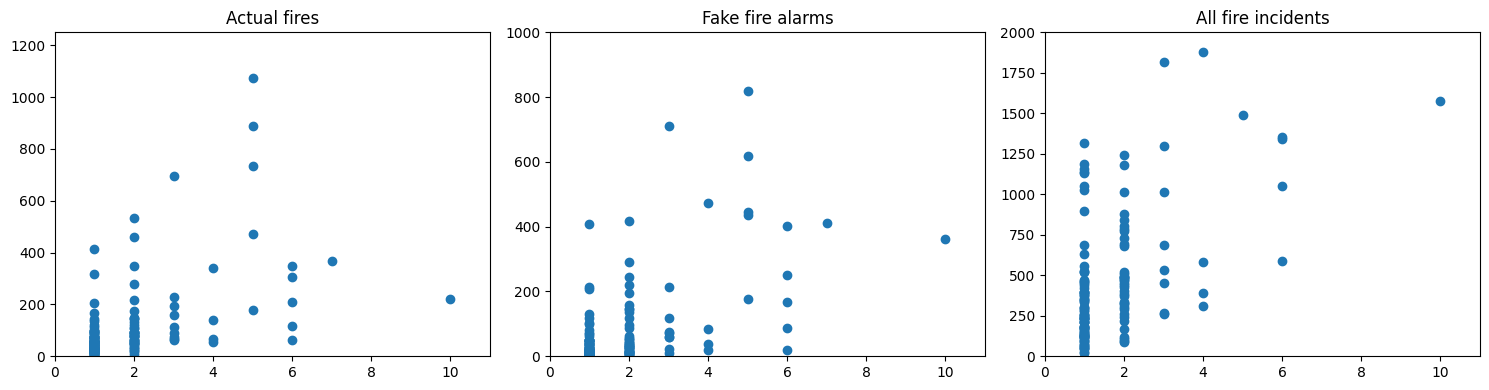

In [22]:
num_of_alc = fires_vs_alcohol_cities["Count"].to_numpy()
fake_fire = fires_vs_alcohol_cities["Alarmy fałszywe rok 2024"].to_numpy()
all_fire = fires_vs_alcohol_cities["Ogółem zdarzeń rok 2024"].to_numpy()
actual_fire = fires_vs_alcohol_cities["Pożary rok 2024"].to_numpy()

x, y1, y2, y3 = num_of_alc, actual_fire, fake_fire, all_fire

fig, axs = plt.subplots(1,3, figsize=(15, 4))

axs[0].scatter(x, y1)
axs[0].set_title('Actual fires')
axs[0].set_xlim([0, 11])
axs[0].set_ylim([0, 1250])

axs[1].scatter(x, y2)
axs[1].set_title('Fake fire alarms')
axs[1].set_xlim([0, 11])
axs[1].set_ylim([0, 1000])

axs[2].scatter(x, y3)
axs[2].set_title('All fire incidents')
axs[2].set_xlim([0, 11])
axs[2].set_ylim([0, 2000])

plt.tight_layout()  
plt.show()

## Number of fire incidents vs population (voievodship)

In [23]:
population_data['Nazwa jednostki'] = population_data['Nazwa jednostki'].str.strip()
population_data['Nazwa jednostki'] = population_data['Nazwa jednostki'].astype(str)


fire_vs_populatio_voj = dp.custom_merge(fires_in_voj, population_data, 'Województwo', 'Nazwa jednostki')
fire_vs_populatio_voj = dp.drop_columns(fire_vs_populatio_voj, ['Nazwa jednostki', 'Kod'])
fire_vs_populatio_voj


,Województwo,Ogółem zdarzeń rok 2024,Pożary rok 2024,Miejscowe zagrożenia rok 2024,Alarmy fałszywe rok 2024,Populacja
0,dolnośląskie,53257,10957,36984,5316,2868242
1,kujawsko-pomorskie,28620,5222,20757,2641,1984479
2,lubelskie,23691,5675,16345,1671,1996440
3,lubuskie,15310,3475,10316,1519,969819
4,mazowieckie,78212,17318,50385,10509,5508322
5,małopolskie,49437,6849,38138,4450,3429084
6,opolskie,16789,2640,12752,1397,930296
7,podkarpackie,27007,5078,20777,1152,2062997
8,podlaskie,13314,3187,9503,624,1132641
9,pomorskie,30700,5466,22852,2382,2359493


In [24]:
corr_all_fire_vs_pop_voj = fire_vs_populatio_voj["Populacja"].corr(fire_vs_populatio_voj["Ogółem zdarzeń rok 2024"])
corr_actual_fire_vs_pop_voj = fire_vs_populatio_voj["Populacja"].corr(fire_vs_populatio_voj["Pożary rok 2024"])
corr_false_fire_vs_pop_voj = fire_vs_populatio_voj["Populacja"].corr(fire_vs_populatio_voj["Alarmy fałszywe rok 2024"])

fire_vs_population_voj_result = pd.DataFrame({
        'Correlation':['# of all fire incidents vs population: ',
                       '# of actual fire incidents vs population: ',
                       '# of false reports of fire incidents vs population: '],

        'value': [corr_all_fire_vs_pop_voj,
                  corr_actual_fire_vs_pop_voj,
                  corr_false_fire_vs_pop_voj
                ]
    })

fire_vs_population_voj_result

,Correlation,value
0,# of all fire incidents vs population:,0.959423
1,# of actual fire incidents vs population:,0.924527
2,# of false reports of fire incidents vs popula...,0.944173


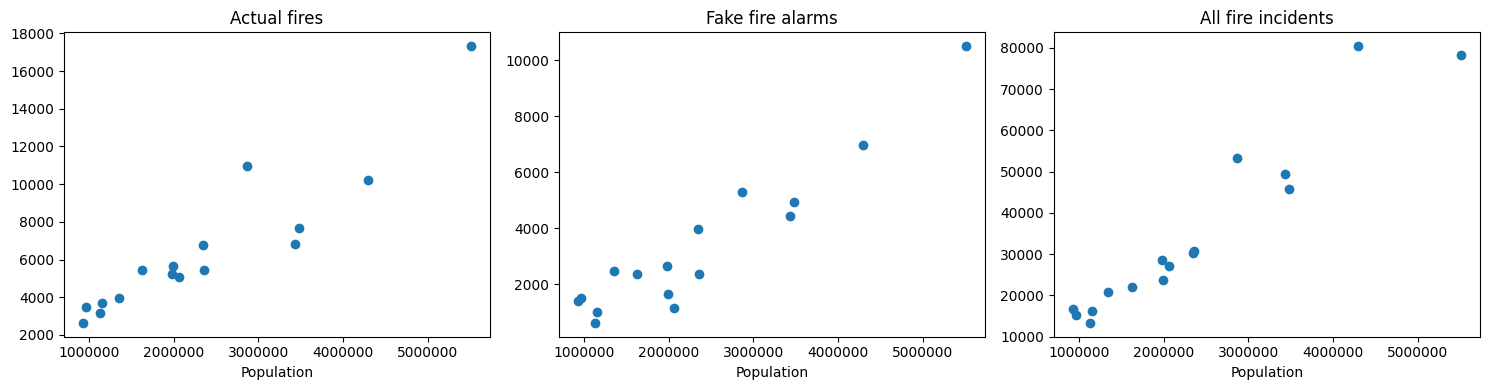

In [25]:
population = fire_vs_populatio_voj["Populacja"].to_numpy()
fake_fire = fire_vs_populatio_voj["Alarmy fałszywe rok 2024"].to_numpy()
all_fire = fire_vs_populatio_voj["Ogółem zdarzeń rok 2024"].to_numpy()
actual_fire = fire_vs_populatio_voj["Pożary rok 2024"].to_numpy()

x, y1, y2, y3 = population, actual_fire, fake_fire, all_fire

fig, axs = plt.subplots(1,3, figsize=(15, 4))

axs[0].scatter(x, y1)
axs[0].set_title('Actual fires')
axs[0].set_xlabel('Population')
#axs[0].set_xlim([0, 11])
#axs[0].set_ylim([0, 1250])
axs[0].ticklabel_format(axis='x', style='plain')
axs[0].ticklabel_format(axis='y', style='plain')


axs[1].scatter(x, y2)
axs[1].set_title('Fake fire alarms')
axs[1].set_xlabel('Population')
#axs[1].set_xlim([0, 11])
#axs[1].set_ylim([0, 1000])
axs[1].ticklabel_format(axis='x', style='plain')


axs[2].scatter(x, y3)
axs[2].set_title('All fire incidents')
axs[2].set_xlabel('Population')
#axs[2].set_xlim([0, 11])
#axs[2].set_ylim([0, 2000])
axs[2].ticklabel_format(axis='x', style='plain')

plt.tight_layout()  
plt.show()

## Number of fire incidents vs population (cities)

In [26]:
fire_vs_populatio_cities = dp.custom_merge(fire_incidents_data, population_data, 'Gmina', 'Nazwa jednostki')
fire_vs_populatio_cities = dp.drop_columns(fire_vs_populatio_cities, ['TERYT', 'Województwo', 'Nazwa jednostki', 'Kod'])
fire_vs_populatio_cities = fire_vs_populatio_cities.groupby('Gmina', as_index = False).sum()
fire_vs_populatio_cities.head()


,Gmina,Ogółem zdarzeń rok 2024,Pożary rok 2024,Miejscowe zagrożenia rok 2024,Alarmy fałszywe rok 2024,Populacja
0,aleksandrów kujawski,401,64,278,59,22852
1,aleksandrów łódzki,465,66,357,42,22023
2,alwernia,200,25,161,14,3211
3,andrychów,585,75,446,64,18071
4,annopol,70,25,44,1,2279


In [27]:
corr_all_fire_vs_pop_cities = fire_vs_populatio_cities["Populacja"].corr(fire_vs_populatio_cities["Ogółem zdarzeń rok 2024"])
corr_actual_fire_vs_pop_cities = fire_vs_populatio_cities["Populacja"].corr(fire_vs_populatio_cities["Pożary rok 2024"])
corr_false_fire_vs_pop_cities = fire_vs_populatio_cities["Populacja"].corr(fire_vs_populatio_cities["Alarmy fałszywe rok 2024"])

fire_vs_population_cities_result = pd.DataFrame({
        'Correlation':['# of all fire incidents vs population: ',
                       '# of actual fire incidents vs population: ',
                       '# of false reports of fire incidents vs population: '],

        'value': [corr_all_fire_vs_pop_cities,
                  corr_actual_fire_vs_pop_cities,
                  corr_false_fire_vs_pop_cities
                ]
    })

fire_vs_population_cities_result

,Correlation,value
0,# of all fire incidents vs population:,0.825703
1,# of actual fire incidents vs population:,0.831221
2,# of false reports of fire incidents vs popula...,0.893027


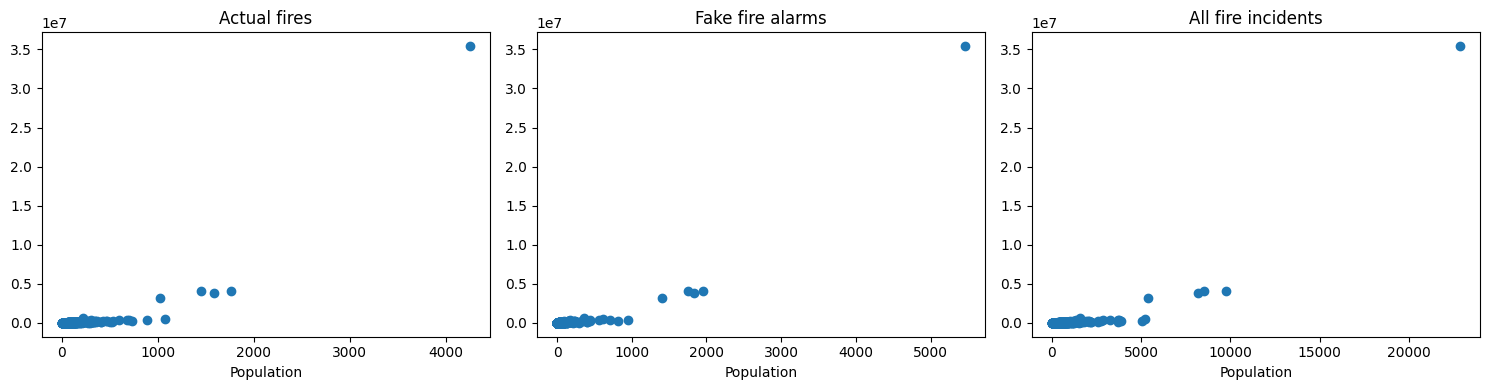

In [28]:
population = fire_vs_populatio_cities["Populacja"].to_numpy()
fake_fire = fire_vs_populatio_cities["Alarmy fałszywe rok 2024"].to_numpy()
all_fire = fire_vs_populatio_cities["Ogółem zdarzeń rok 2024"].to_numpy()
actual_fire = fire_vs_populatio_cities["Pożary rok 2024"].to_numpy()

x, y1, y2, y3 = population, actual_fire, fake_fire, all_fire

fig, axs = plt.subplots(1,3, figsize=(15, 4))

axs[0].scatter(y1, x)
axs[0].set_title('Actual fires')
axs[0].set_xlabel('Population')


axs[1].scatter(y2, x)
axs[1].set_title('Fake fire alarms')
axs[1].set_xlabel('Population')


axs[2].scatter(y3, x)
axs[2].set_title('All fire incidents')
axs[2].set_xlabel('Population')

plt.tight_layout()  
plt.show()